# Experiment 2: Plotting
The following notebook is to document some initial experimentation into integrating the ProgPy and fmdtools codebases to share/extend the functionality of each individual library. 

This notebook documents what should be low-hanging fruit: plotting. 

While most people know how to plot in matplotlib, it can be helpful to have some set plots which show values of interest in each analysis, lets you run comparisons, etc. Since dynamic models often plot time-series data, the plots that we use are often similar accross models and analyses. This is why the fmdtools.resultdisp.plot module exists.

In this notebook I will show how rd.plot can be used on progpy model results with a little adaptation.

In [5]:
from prog_models.models import Powertrain, ESC, DCMotor
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

As with the previous experiment, here I am using the composite model example which is the powertrain.

In [6]:
esc = ESC()
motor = DCMotor()
powertrain = Powertrain(esc, motor)

Here we simulate the powertrain given a provided loading:

In [7]:
# Define future loading function - 100% duty all the time
def future_loading(t, x=None):
    return powertrain.InputContainer({
        'duty': 1,
        'v': 23
    })

In [10]:
simulated_results = powertrain.simulate_to(2, future_loading, dt=2e-5, save_freq=0.1)     

These results have the following structure:

In [11]:
# time
time = simulated_results[0]
time

[0.0,
 0.10001999999999392,
 0.20000000000005924,
 0.30000000000015925,
 0.40000000000025926,
 0.5000000000003593,
 0.6000199999999041,
 0.700019999999449,
 0.8000199999989939,
 0.9000199999985388,
 1.0000199999980839,
 1.100019999998739,
 1.2000199999993941,
 1.3000000000000491,
 1.4000000000007042,
 1.5000000000013594,
 1.6000000000020145,
 1.7000000000026696,
 1.8000000000033247,
 1.9000000000039798,
 2.000000000004635]

In [12]:
# input
inputs = simulated_results[1]
inputs

[{'duty': 1.0, 'v': 23.0}, {'duty': 1.0, 'v': 23.0}, {'duty': 1.0, 'v': 23.0}, {'duty': 1.0, 'v': 23.0}, {'duty': 1.0, 'v': 23.0}, {'duty': 1.0, 'v': 23.0}, {'duty': 1.0, 'v': 23.0}, {'duty': 1.0, 'v': 23.0}, {'duty': 1.0, 'v': 23.0}, {'duty': 1.0, 'v': 23.0}, {'duty': 1.0, 'v': 23.0}, {'duty': 1.0, 'v': 23.0}, {'duty': 1.0, 'v': 23.0}, {'duty': 1.0, 'v': 23.0}, {'duty': 1.0, 'v': 23.0}, {'duty': 1.0, 'v': 23.0}, {'duty': 1.0, 'v': 23.0}, {'duty': 1.0, 'v': 23.0}, {'duty': 1.0, 'v': 23.0}, {'duty': 1.0, 'v': 23.0}, {'duty': 1.0, 'v': 23.0}]

In [13]:
# states
states = simulated_results[2]
states

[{'v_a': 0.0, 'v_b': 0.0, 'v_c': 0.0, 't': 0.0, 'i_a': 0.0, 'i_b': 0.0, 'i_c': 0.0, 'v_rot': 0.0, 'theta': 0.0}, {'v_a': 22.999999559639313, 'v_b': 2.2605189359713045e-06, 'v_c': -22.99999914988397, 't': 0.10007834441396783, 'i_a': 9.241678849163456, 'i_b': -9.172294530090829, 'i_c': 4.231044432989356, 'v_rot': 566.9322650104185, 'theta': 1.9037971708025134}, {'v_a': -3.783840400153041e-07, 'v_b': -23.000002038543816, 'v_c': 23.0000003122878, 't': 0.1999980228110106, 'i_a': -6.476491750990789, 'i_b': 2.7363475182079955, 'i_c': 7.426307078340163, 'v_rot': 600.416866710254, 'theta': 6.1509802864530565}, {'v_a': 23.000000154179777, 'v_b': -22.999999309815177, 'v_c': -3.9217021397231005e-06, 't': 0.29999592463153213, 'i_a': -4.259417988334338, 'i_b': -4.369653872005206, 'i_c': 4.0769108526385835, 'v_rot': 655.2238271882836, 'theta': 0.33368029461873305}, {'v_a': 1.6943571889036314e-06, 'v_b': -22.999999835129486, 'v_c': 23.00000158624047, 't': 0.40003113742525365, 'i_a': -5.253026501698581

In [14]:
#outputs
outputs = simulated_results[3]
outputs

[{'v_rot': 0.0, 'theta': 0.0}, {'v_rot': 566.9322650104185, 'theta': 1.9037971708025134}, {'v_rot': 600.416866710254, 'theta': 6.1509802864530565}, {'v_rot': 655.2238271882836, 'theta': 0.33368029461873305}, {'v_rot': 690.4573813511054, 'theta': 5.4738397850771054}, {'v_rot': 711.0494200523041, 'theta': 2.02236970786672}, {'v_rot': 731.3895509940359, 'theta': 1.413397814265525}, {'v_rot': 742.4438778751336, 'theta': 5.609522153507741}, {'v_rot': 744.2223200268211, 'theta': 2.947747712122081}, {'v_rot': 745.1089147048566, 'theta': 0.2011214056571296}, {'v_rot': 741.8338656118129, 'theta': 3.8984612339417337}, {'v_rot': 745.9417602244312, 'theta': 0.839898832899884}, {'v_rot': 745.6062398345862, 'theta': 4.6099234667653075}, {'v_rot': 741.5268647179166, 'theta': 1.7955166090315018}, {'v_rot': 747.2379810997621, 'theta': 5.443886400162917}, {'v_rot': 743.1521194757976, 'theta': 2.8950580327896884}, {'v_rot': 742.7670678459496, 'theta': 0.18350084262697594}, {'v_rot': 741.184120194288, 'th

In [15]:
# events
events = simulated_results[4]
events

[{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}]

As shown, aside from the time log, the history is a list of dictionaries. This is helpful for variable-time simulations, but can make plotting a little difficult. Most fmdtools plot functions assume a model history of the form of a nested dict whose values are numpy arrays (or lists). The following code makes this translation between a progpy and fmdtools simulation history:

In [16]:
def sim_res_to_mdlhist(simulated_results):
    """
    Converts a ProgPy SimulatedResults structure into a nested dict of numpy arrays
    (which is used as a fmdtools mdlhist).

    Parameters
    ----------
    simulated_results : ProgPy SimulatedResults

    Returns
    -------
    mdlhist : dict
        Nested dict with structure {"time": time, (np.array)
                                    "inputs": inputs, (dict of np.array)
                                    "states": states, (dict of np.array) 
                                    "outputs": outputs (dict of np.array) 
                                    "events": events (dict of np.array)}
    """
    mdlhist=dict.fromkeys(["time", "inputs", "states", "outputs", "events"])
    time_range = range(len(simulated_results[0]))
    for i, k in enumerate(mdlhist):
        if type(simulated_results[i][0]) in [int, float]:
            hist = np.array(simulated_results[i])
        else:
            hist = dict.fromkeys(simulated_results[i][0])
            for field in hist:
                hist[field]=np.array([simulated_results[i][t][field] for t in time_range])
        mdlhist[k]=hist
    return mdlhist

In [18]:
mdlhist = sim_res_to_mdlhist(simulated_results)
mdlhist

{'time': array([0.     , 0.10002, 0.2    , 0.3    , 0.4    , 0.5    , 0.60002,
        0.70002, 0.80002, 0.90002, 1.00002, 1.10002, 1.20002, 1.3    ,
        1.4    , 1.5    , 1.6    , 1.7    , 1.8    , 1.9    , 2.     ]),
 'inputs': {'duty': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.]),
  'v': array([23., 23., 23., 23., 23., 23., 23., 23., 23., 23., 23., 23., 23.,
         23., 23., 23., 23., 23., 23., 23., 23.])},
 'states': {'v_a': array([ 0.00000000e+00,  2.29999996e+01, -3.78384040e-07,  2.30000002e+01,
          1.69435719e-06,  2.29999979e+01,  2.29999992e+01,  1.84612352e-06,
          2.02020622e-06,  1.47490874e-06, -2.29999988e+01,  2.29999988e+01,
         -2.30000019e+01,  2.30000009e+01, -2.29999978e+01,  1.03735507e-06,
         -1.42020759e-06, -2.29999983e+01,  2.30000031e+01, -2.29999990e+01,
         -1.00102097e-06]),
  'v_b': array([ 0.00000000e+00,  2.26051894e-06, -2.30000020e+01, -2.29999993e+01,
         -

We can then plot this with `rd.plot.mdhist`:

In [20]:
from fmdtools import resultdisp as rd

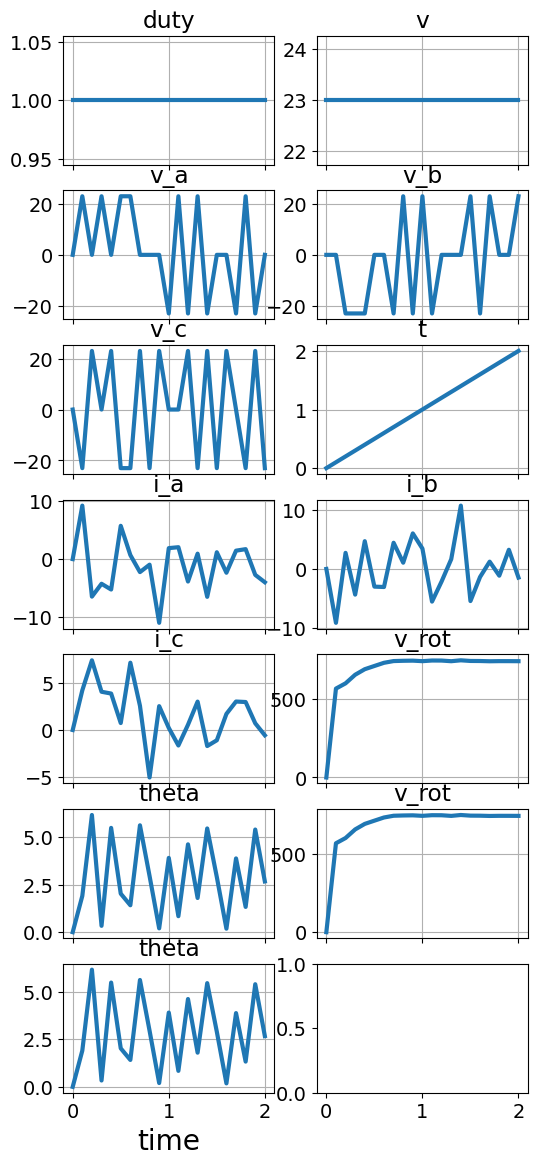

In [22]:
fig, axs= rd.plot.mdlhists(mdlhist)

By default, plot shows all values, but we can key this as follows with the fxnflowvals parameter. Note that in this case the fxnflowvals parameter doesn't necessarily specify a function or flow, but instead just values.

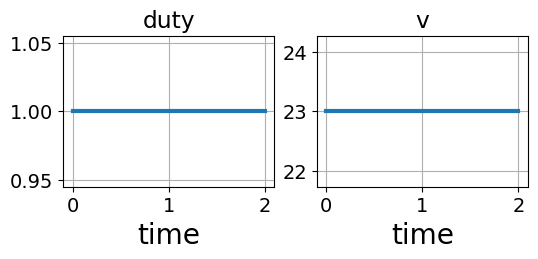

In [24]:
fig, axs = rd.plot.mdlhists(mdlhist, fxnflowvals="inputs")

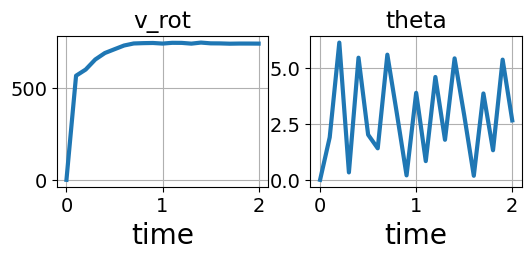

In [25]:
fig, axs = rd.plot.mdlhists(mdlhist, fxnflowvals={"states":["theta", "v_rot"]})

## Discussion

As shown, the integration here is fairly easy. It should be noted that aside from simple plotting of a single scenario over time, `plot` has the capability to plot over a large number of scenarios and run comparison between sets of scenarios. Thus, it could be very helpful to use in a ProgPy workflow. That said, there are some things which could be improved:
- ProgPy should consider storing attributes as a nested dict of lists or arrays. This would make the translation into rd.plot direct. It would also likely make simulation faster and take less memory, since a dict would not be copied and stored at each iteration.
    - There are pros and cons to using a list or array as the base structure: lists can be appended at each iteration, while arrays must be initialized to a set size beforehand. In fmdtools, we chose to initialize arrays to the max model history, and then cut them afterward. This has some obvious pitfalls if a condition is expected to triggered much earlier than the max simulation time.
- On the fmdtools side, we may want to consider what use-cases a prognostics modeller might have for these methods. Additionally, we may want to change "fxnflowvals" and similar keywords to something more generic.
- Jointly, we may want to consider a better way of storing time-series data. On the fmdtools side, we may want to (in the future) make mdlhist a lighter-weight structure that is easier to navigate than a nested list. But, changing it is a low priority overall. 